In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow import keras

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score , classification_report

In [ ]:
fashion = keras.datasets.fashion_mnist

In [ ]:
(x_train_sp,y_train_sp),(x_test_sp,y_test_sp) = fashion.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
items_names = ["T-shirt/Top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneakers","Bag","Ankle Boot"]

In [ ]:
x_train_sp = x_train_sp.reshape((60000,28,28,1))
x_test_sp = x_test_sp.reshape((10000,28,28,1))


In [ ]:
x_train_norm = x_train_sp/255
x_test_norm = x_test_sp/255

In [ ]:
 x_validate, x_train = x_train_norm[:5000], x_train_norm[5000:]
y_validate, y_train = y_train_sp[:5000], y_train_sp[5000:]
x_test = x_test_norm

In [ ]:
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential()

In [ ]:
model.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),strides = 1,
                              padding = 'valid',activation = 'relu',input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())

In [ ]:
model.add(keras.layers.Dense(300,activation = 'relu'))

In [ ]:
model.add(keras.layers.Dense(100,activation = 'relu'))
model.add(keras.layers.Dense(10,activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 300)               1622700   
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                        

In [ ]:
model.compile(loss = "sparse_categorical_crossentropy",optimizer = "sgd",metrics=["accuracy"])

In [ ]:
model_fit = model.fit(x_train,y_train,epochs= 10,batch_size = 64,validation_data=(x_validate,y_validate))

Epoch 1/10
860/860 [==============================] - 56s 63ms/step - loss: 0.8376 - accuracy: 0.7040 - val_loss: 0.7417 - val_accuracy: 0.7322
Epoch 2/10
860/860 [==============================] - 38s 44ms/step - loss: 0.5301 - accuracy: 0.8071 - val_loss: 0.4976 - val_accuracy: 0.8156
Epoch 3/10
860/860 [==============================] - 43s 50ms/step - loss: 0.4714 - accuracy: 0.8299 - val_loss: 0.9447 - val_accuracy: 0.6996
Epoch 4/10
860/860 [==============================] - 39s 45ms/step - loss: 0.4345 - accuracy: 0.8455 - val_loss: 0.4051 - val_accuracy: 0.8598
Epoch 5/10
860/860 [==============================] - 51s 59ms/step - loss: 0.4100 - accuracy: 0.8531 - val_loss: 0.4085 - val_accuracy: 0.8540
Epoch 6/10
860/860 [==============================] - 54s 63ms/step - loss: 0.3865 - accuracy: 0.8621 - val_loss: 0.3634 - val_accuracy: 0.8768
Epoch 7/10
860/860 [==============================] - 43s 50ms/step - loss: 0.3689 - accuracy: 0.8697 - val_loss: 0.3949 - val_accuracy:

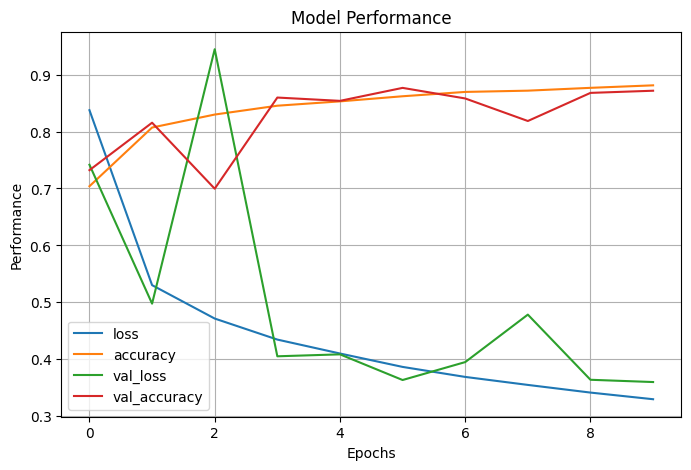

In [ ]:
pd.DataFrame(model_fit.history).plot(figsize=(8,5))
plt.title('Model Performance')
plt.xlabel('Epochs')
plt.ylabel('Performance')
plt.grid(True)
plt.show()

In [ ]:
score = model.evaluate(x_test,y_test_sp)

313/313 [==============================] - 3s 10ms/step - loss: 0.3881 - accuracy: 0.8556


In [ ]:
y_pred = np.argmax(model.predict(x_test),axis = -1)

313/313 [==============================] - 5s 14ms/step


In [ ]:
print('Predicted Class :' , y_pred[:3])

Predicted Class : [9 2 1]


In [ ]:
print('Predicted class in labels :',np.array(items_names)[y_pred[:3]])

Predicted class in labels : ['Ankle Boot' 'Pullover' 'Trouser']


In [ ]:
print('Confusion matrix : \n',confusion_matrix(y_test_sp,y_pred))

Confusion matrix : 
 [[855   0  17  35   2   2  81   0   7   1]
 [  3 961   3  25   2   0   5   0   1   0]
 [ 19   0 853  11  29   0  86   0   2   0]
 [ 24   6  10 901  17   0  38   0   4   0]
 [  0   0 201  44 554   0 200   0   1   0]
 [  0   0   0   1   0 950   0  26   1  22]
 [156   0  91  26  35   0 684   0   8   0]
 [  0   0   0   0   0  25   0 856   1 118]
 [  4   1  12   8   1   2   8   5 958   1]
 [  0   0   0   0   0   3   1  12   0 984]]


In [ ]:
print('Accuracy Score:',accuracy_score(y_test_sp,y_pred))

Accuracy Score: 0.8556
